# About the dataset

### Column description
- **gender**: Gender- Male='M',Female='F'

- **sl_no**: Serial Number

- **ssc_p**: Secondary Education percentage 10th Grade

- **ssc_b**: Board of Education - Central/ Others(10th Board of Education)

- **hsc_p**: Higher Secondary Education percentage - 12th Grade

- **hsc_b**: Board of Education- Central/ Others(12th Board of Education)

- **hsc_s**: Specialization in Higher Secondary Education

- **degree_p**: Degree Percentage(Undergraduate)

- **degree_t**: Under Graduation(Degree type)- Field of degree education

- **workex**: Work Experience

- **etest_p**: Employability test percentage ( conducted by college)

- **specialisation**: Post Graduation(MBA)- Specialization

- **mba_p**: MBA percentage

- **status**: Status of placement- Placed/Not placed

- **salary**: Salary offered by corporate to candidates

# Exploratory Data Analysis

In [194]:
# Libraries
# Install scikit-plot
# ! pip install scikit-plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtic
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scikitplot
import warnings
warnings.filterwarnings('ignore')

# Set plot configuration and size
plt.style.use('seaborn')
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)

In [196]:
# Load the dataset csv file
dataset = pd.read_csv("Placement_Data_Full_Class-2.csv")
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [52]:
# Check number of null values in columns
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [53]:
# Delete the serial number column
dataset.drop('sl_no',axis=1,inplace=True)
dataset.shape

(215, 14)

In [54]:
dataset.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [183]:
dataset.groupby('status').mean()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
status,,,,,,,,,,,,,,,,,,
0,57.544030,58.395522,61.134179,69.587910,61.612836,NaN,0.567164,0.432836,0.402985,0.597015,0.074627,0.507463,0.417910,0.641791,0.089552,0.268657,0.373134,0.626866
1,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405,0.527027,0.472973,0.385135,0.614865,0.040541,0.533784,0.425676,0.689189,0.033784,0.277027,0.641892,0.358108


### Gender bias

In [188]:
dataset.groupby(["gender","status"]).size().unstack()

status,0,1
gender,,
0.0,28,48
1.0,39,100


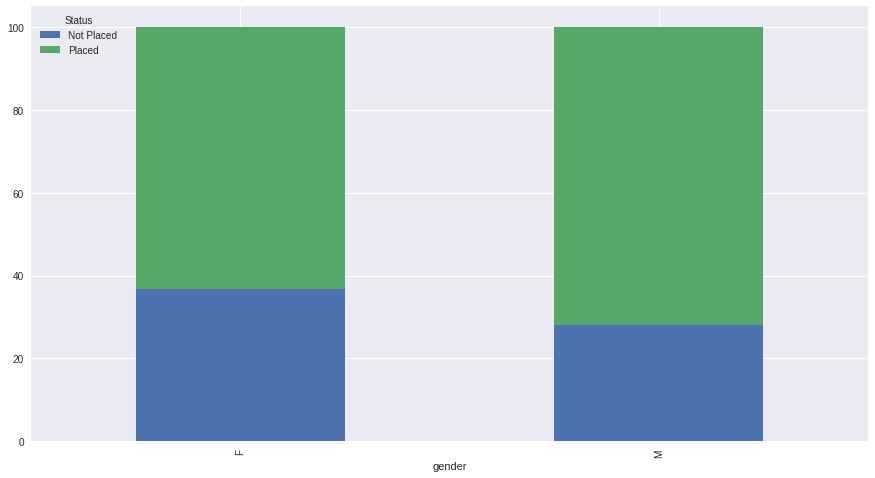

In [56]:
dataset.groupby(["gender","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)


plt.legend(loc = 'upper left',title = 'Status')
plt.show()

### Specialisation in Higher Secondary School

In [204]:
dataset.groupby(["hsc_s","status"]).size().unstack()

status,Not Placed,Placed
hsc_s,,
Arts,5,6
Commerce,34,79
Science,28,63


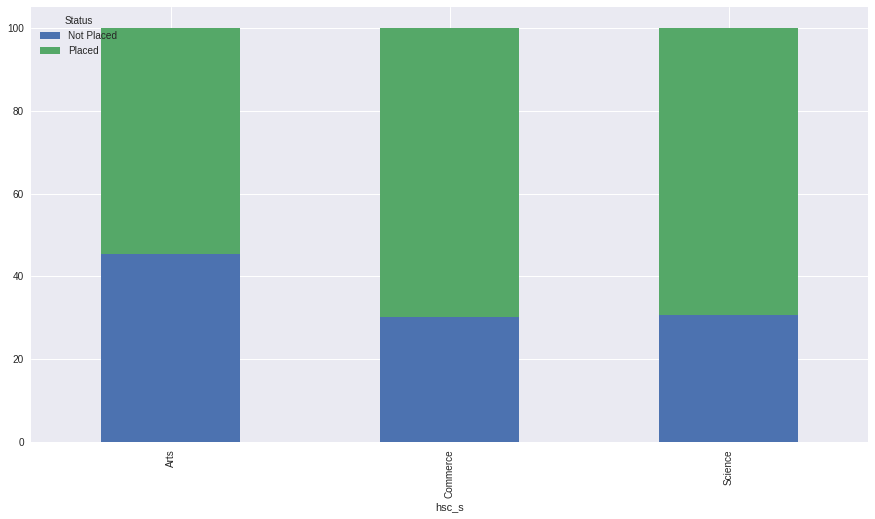

In [205]:
dataset.groupby(["hsc_s","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)


plt.legend(loc = 'upper left',title = 'Status')
plt.show()

### Under Graduation(Degree type)- Field of degree education

In [203]:
dataset.groupby(["degree_t","status"]).size().unstack()

status,Not Placed,Placed
degree_t,,
Comm&Mgmt,43,102
Others,6,5
Sci&Tech,18,41


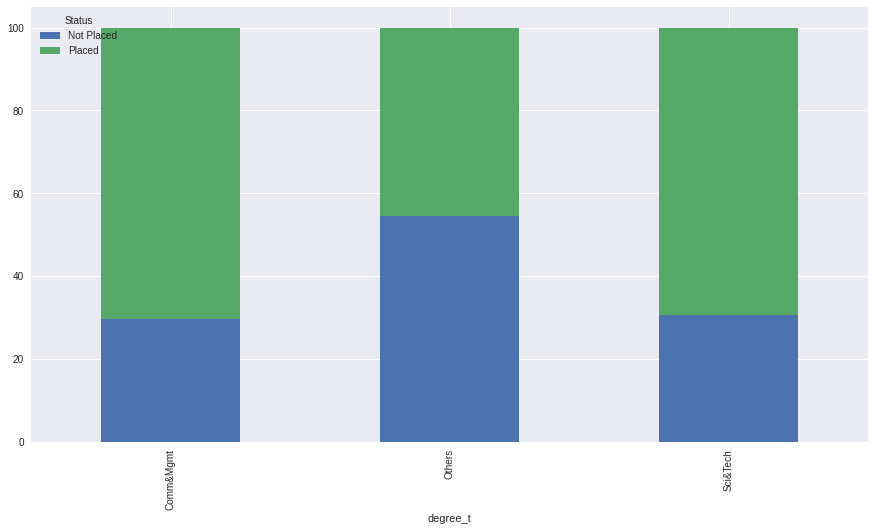

In [206]:
dataset.groupby(["degree_t","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)


plt.legend(loc = 'upper left',title = 'Status')
plt.show()

### Work Experience

In [207]:
dataset.groupby(["workex","status"]).size().unstack()

status,Not Placed,Placed
workex,,
No,57,84
Yes,10,64


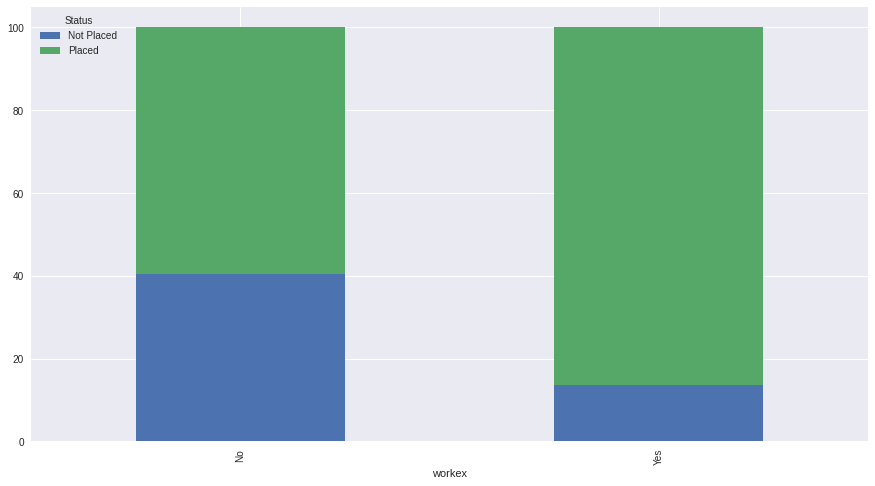

In [208]:
dataset.groupby(["workex","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)


plt.legend(loc = 'upper left',title = 'Status')
plt.show()

### Post Graduation(MBA)- Specialization

In [211]:
dataset.groupby(["specialisation","status"]).size().unstack()

status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,95
Mkt&HR,42,53


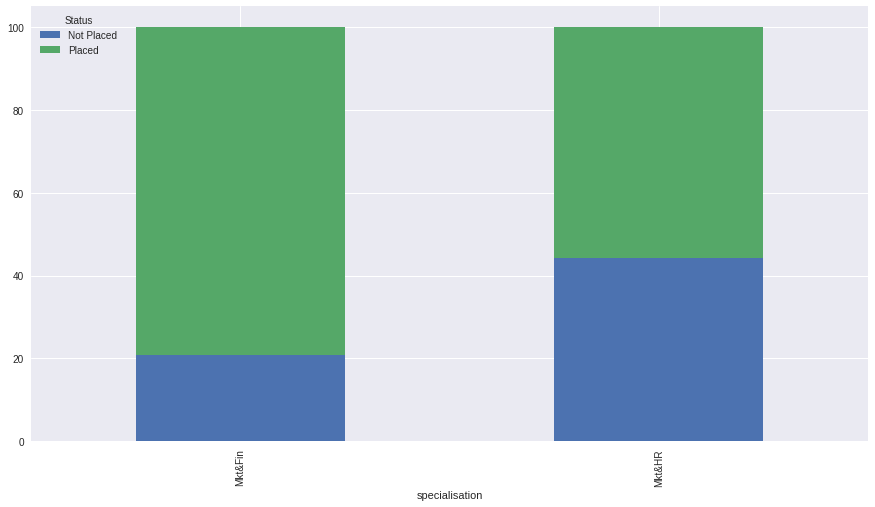

In [210]:
dataset.groupby(["specialisation","status"]).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)


plt.legend(loc = 'upper left',title = 'Status')
plt.show()

# Classification & Models

### Random Forest

In [57]:
# Transform the dataset, One Hot Encoding
dataset.loc[dataset['gender'] == 'M', 'gender'] = 1.0
dataset.loc[dataset['gender'] == 'F', 'gender'] = 0.0

dataset.loc[dataset['status'] == 'Placed', 'status'] = 1
dataset.loc[dataset['status'] == 'Not Placed', 'status'] = 0

dataset.loc[dataset['workex'] == 'Yes', 'workex'] = 1.0
dataset.loc[dataset['workex'] == 'No', 'workex'] = 0.0

# Categorical columns
categ_col = ['ssc_b','hsc_b','hsc_s','degree_t','specialisation']

for col in categ_col:
    dummies = pd.get_dummies(dataset[col],prefix=col)
    dataset = pd.concat([dataset,dummies],axis=1)
    dataset.drop([col],axis=1,inplace=True)


dataset.head(10)

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Central,...,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1.0,67.00,91.00,58.00,0.0,55.00,58.80,1,270000.0,0,...,0,1,0,1,0,0,0,1,0,1
1,1.0,79.33,78.33,77.48,1.0,86.50,66.28,1,200000.0,1,...,0,1,0,0,1,0,0,1,1,0
2,1.0,65.00,68.00,64.00,0.0,75.00,57.80,1,250000.0,1,...,1,0,1,0,0,1,0,0,1,0
3,1.0,56.00,52.00,52.00,0.0,66.00,59.43,0,NaN,1,...,1,0,0,0,1,0,0,1,0,1
4,1.0,85.80,73.60,73.30,0.0,96.80,55.50,1,425000.0,1,...,1,0,0,1,0,1,0,0,1,0
5,1.0,55.00,49.80,67.25,1.0,55.00,51.58,0,NaN,0,...,0,1,0,0,1,0,0,1,1,0
6,0.0,46.00,49.20,79.00,0.0,74.28,53.29,0,NaN,0,...,0,1,0,1,0,1,0,0,1,0
7,1.0,82.00,64.00,66.00,1.0,67.00,62.14,1,252000.0,1,...,1,0,0,0,1,0,0,1,1,0
8,1.0,73.00,79.00,72.00,0.0,91.34,61.29,1,231000.0,1,...,1,0,0,1,0,1,0,0,1,0
9,1.0,58.00,70.00,61.00,0.0,54.00,52.21,0,NaN,1,...,1,0,0,1,0,1,0,0,1,0


In [119]:
x = dataset.drop(['status','salary'], axis=1)
y = dataset['status'].astype(float)

# split train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=42)

In [169]:
rf_regressor = RandomForestRegressor(100, oob_score=True,
                                     n_jobs=-1, random_state=42)
rf_regressor.fit(train_x,train_y)
print('Score: ', rf_regressor.score(train_x,train_y))

Score:  0.930809991638796


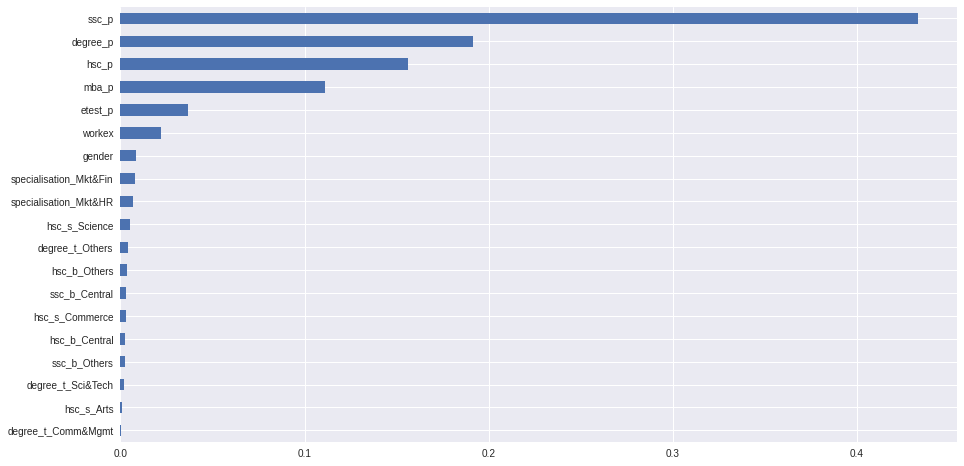

In [170]:
feature_importance = pd.Series(rf_regressor.feature_importances_,index=x.columns)
feature_importance = feature_importance.sort_values()
feature_importance.plot(kind='barh')

In [171]:
results = []
n_estimator_options = [35,50,100,200,500,1000,2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees,oob_score=True,n_jobs=-1,random_state=42)
    model.fit(x,y)
    print(trees," trees")
    score = model.score(train_x,train_y)
    print(score)
    results.append(score)
    print("")

35  trees
0.9314551907719609

50  trees
0.934757525083612

100  trees
0.9364538043478261

200  trees
0.9384769544314381

500  trees
0.9381707775919732

1000  trees
0.9368050689799331

2000  trees
0.937170795882107



In [172]:
results = []
max_features_options = ['auto',None,'sqrt','log2',0.9,0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=200,oob_score=True,n_jobs=-1,
                                  random_state=42,max_features=max_features)
    model.fit(x,y)
    print(max_features," option")
    score = model.score(train_x,train_y)
    print(score)
    results.append(score)
    print("")

auto  option
0.9384769544314381

None  option
0.9384769544314381

sqrt  option
0.9390570129598662

log2  option
0.9390570129598662

0.9  option
0.9369554765886288

0.2  option
0.933998745819398



In [173]:
results = []
min_sample_leaf_option = [1,2,3,4,5,6,7,8,9,10]

for min_sample_leaf in min_sample_leaf_option:
    model = RandomForestRegressor(n_estimators=200,oob_score=True,n_jobs=-1,
                                  random_state=42,max_features='sqrt',
                                  min_samples_leaf=min_sample_leaf)
    model.fit(x,y)
    print(min_sample_leaf," min samples")
    score = model.score(train_x,train_y)
    print(score)
    results.append(score)
    print("")

1  min samples
0.9390570129598662

2  min samples
0.8468437412943985

3  min samples
0.7849329211313523

4  min samples
0.7429301237527113

5  min samples
0.7036783300373053

6  min samples
0.6768184101753146

7  min samples
0.6556513671298128

8  min samples
0.6392326149831353

9  min samples
0.6179466096568267

10  min samples
0.601184726503665



In [175]:
rf = RandomForestRegressor(200, oob_score=True,max_features='sqrt',
                                     n_jobs=-1, random_state=42,min_samples_leaf=1)
rf.fit(x,y)
print('Score: ', rf.score(train_x,train_y))

Score:  0.9390570129598662


In [180]:
rf = RandomForestClassifier(200, oob_score=True,max_features='sqrt',
                                     n_jobs=-1, random_state=42,min_samples_leaf=1)
rf.fit(train_x, train_y)
pred_y = rf.predict(test_x)
rf.score(test_x, test_y)

0.8

Text(315.06, 0.5, 'true value')

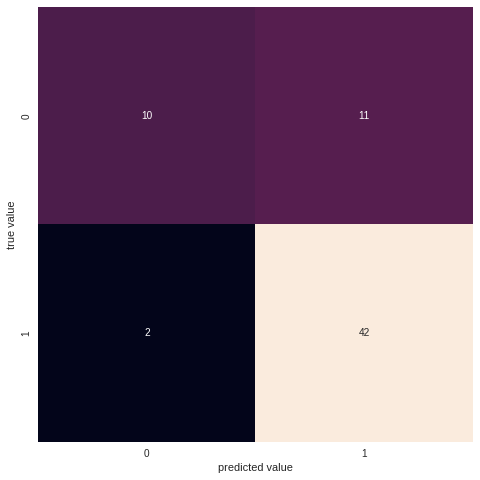

In [181]:
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, square=True, annot=True, cbar=False) 
plt.xlabel('predicted value')
plt.ylabel('true value')

## Logistic Regression

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.fit_transform(test_x)

In [130]:
lr_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}

search = GridSearchCV(lr_model, param_grid, cv=5).fit(X_train_scaled, train_y)

y_predicted = search.predict(X_test_scaled)

print(f"The best parameters are {search.best_params_}")
print(f"F1 score of this model: {f1_score(test_y, y_predicted, average='macro')}")
print(f"Accuracy score of this model: {search.score(X_test_scaled, test_y)}\n")

The best parameters are {'C': 0.08858667904100823, 'l1_ratio': 0.2, 'penalty': 'elasticnet'}
F1 score of this model: 0.7458646616541353
Accuracy score of this model: 0.8



Text(315.06, 0.5, 'true value')

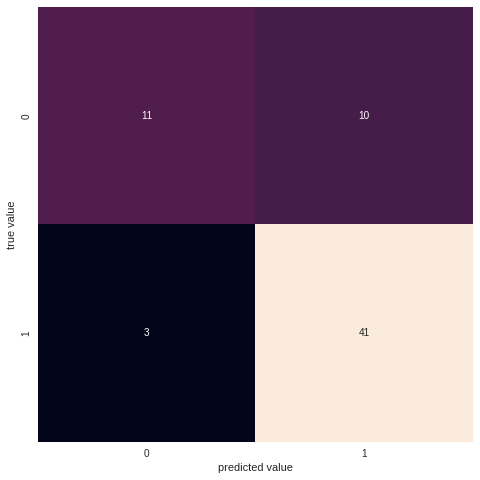

In [156]:
mat = confusion_matrix(test_y,y_predicted)
sns.heatmap(mat, square=True, annot=True, cbar=False) 
plt.xlabel('predicted value')
plt.ylabel('true value')

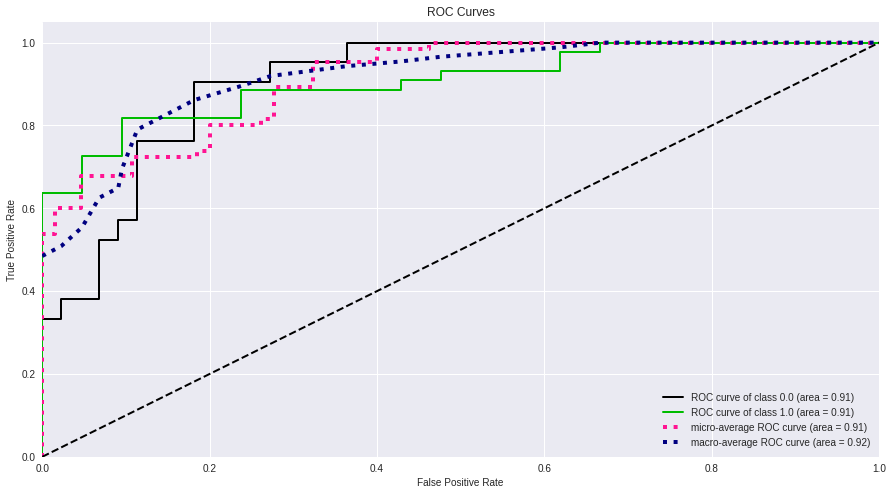

In [137]:
# Plot the ROC-curve
predicted_proba = search.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(test_y, predicted_proba)
plt.show()

## Regression


In [67]:
# Get only rows with status placed
placed_dataset = dataset[dataset['status'] == 1].drop('status',axis = 1)
placed_dataset.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,salary,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,270000.0,0,1,0,1,0,1,0,0,0,1,0,1
1,1.0,79.33,78.33,77.48,1.0,86.5,66.28,200000.0,1,0,0,1,0,0,1,0,0,1,1,0
2,1.0,65.00,68.00,64.00,0.0,75.0,57.80,250000.0,1,0,1,0,1,0,0,1,0,0,1,0
4,1.0,85.80,73.60,73.30,0.0,96.8,55.50,425000.0,1,0,1,0,0,1,0,1,0,0,1,0
7,1.0,82.00,64.00,66.00,1.0,67.0,62.14,252000.0,1,0,1,0,0,0,1,0,0,1,1,0


In [101]:
# Processing and selecting only few columns for the linear regression
columns = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','gender','workex']
x = placed_dataset.loc[:,columns]

y = placed_dataset.loc[:,placed_dataset.columns == 'salary']
x.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,workex
0,67.00,91.00,58.00,55.0,58.80,1.0,0.0
1,79.33,78.33,77.48,86.5,66.28,1.0,1.0
2,65.00,68.00,64.00,75.0,57.80,1.0,0.0
4,85.80,73.60,73.30,96.8,55.50,1.0,0.0
7,82.00,64.00,66.00,67.0,62.14,1.0,1.0


In [102]:
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.2, random_state=42)
print(train_x.shape)
print(test_x.shape)

(118, 7)
(30, 7)


In [109]:
lm = sm.OLS(train_y,train_x.astype(float))
results = lm.fit()
results.params

pred_y = results.predict(test_x)

prediction = pd.concat([test_y,pred_y],axis=1)
prediction.columns = col
prediction

,actual,prediction
178,350000.0,342759.220377
74,336000.0,344418.980902
203,260000.0,299097.458453
28,350000.0,315198.881335
145,400000.0,289461.723799
20,265000.0,262239.158393
112,250000.0,261264.063905
48,250000.0,303715.286147
117,240000.0,318652.219276
15,200000.0,276823.666404


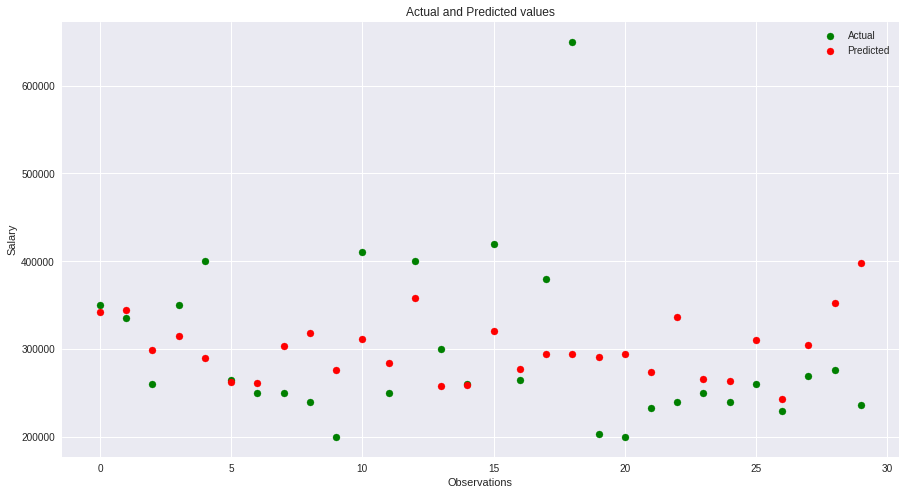

In [114]:
_, ax = plt.subplots()

ax.scatter(x = range(0, test_y.size), y=test_y, c = 'green', label = 'Actual')
ax.scatter(x = range(0, pred_y.size), y=pred_y, c = 'red', label = 'Predicted')

plt.title('Actual and Predicted values')
plt.xlabel('Observations')
plt.ylabel('Salary')
plt.legend()
plt.show()